In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv'
companies = pd.read_csv(url)
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


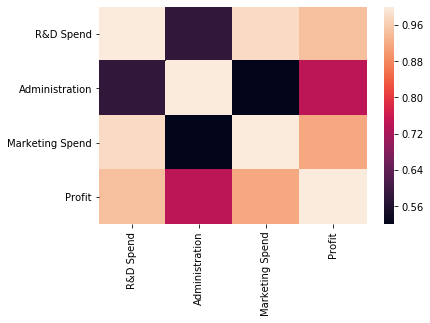

In [3]:
sns.heatmap(companies.corr())

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

In [0]:
X = X[:,1:]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_reg.predict(X_test)


In [10]:
print(lin_reg.coef_)

[-2.19771188e+04  5.70580395e-03 -2.27095802e+04 ...  8.36900656e+02
 -5.72032300e+02 -2.65053932e+02]


In [11]:
print(lin_reg.intercept_)

118464.71565122058


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0033997383259638525